In [11]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import os as os
import networkx as nx

# Reading the DataFrame
data = pd.read_csv("/Users/krissy/Downloads/airlinedata.csv")

data.head(40)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


In [37]:
os.getcwd()
data.head(4)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515


In [59]:
data.Dest.unique().sort()

In [51]:
data.Origin.unique()

array(['IAD', 'IND', 'ISP', 'JAN', 'JAX', 'LAS', 'LAX', 'LBB', 'LIT',
       'MAF', 'MCI', 'MCO', 'MDW', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA',
       'ONT', 'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PVD', 'RDU',
       'RNO', 'RSW', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC',
       'SMF', 'SNA', 'STL', 'TPA', 'TUL', 'TUS', 'ABQ', 'ALB', 'AMA',
       'AUS', 'BDL', 'BHM', 'BNA', 'BOI', 'BUF', 'BUR', 'BWI', 'CLE',
       'CMH', 'CRP', 'DAL', 'DEN', 'DTW', 'ELP', 'FLL', 'GEG', 'HOU',
       'HRL'], dtype=object)

In [35]:
df = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)


In [36]:
df.nodes()

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

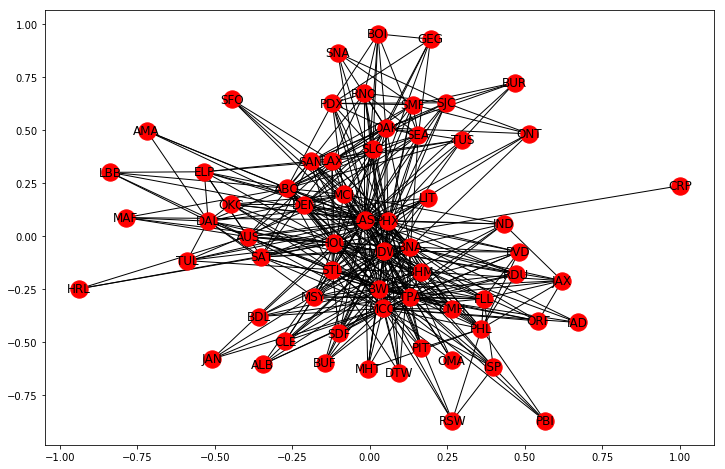

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(12,8))
nx.draw_networkx(df, with_labels=True)

In [17]:
shortest_path_distance = nx.dijkstra_path(df, source='AMA', target='PBI', weight='Distance')
shortest_path_distance

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

In [18]:
shortest_path_airtime = nx.dijkstra_path(df, source='AMA', target='PBI', weight='AirTime')
shortest_path_airtime

['AMA', 'DAL', 'BHM', 'TPA', 'PBI']